In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/validation'
PATH_SAVED_MODEL = 'inception-v3-imagenet.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12971 images belonging to 7 classes.
Found 1612 images belonging to 7 classes.
Found 1602 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = InceptionV3(
    input_shape=input_shape, 
    weights="imagenet", 
    include_top=False, 
    pooling='max'
)

for layer in model.layers:
    layer.trainable = False

i = Input(shape=input_shape)
x = model(i)
x = Flatten()(x)
x = Dense(output_shape, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-12-08 20:49:26.475763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 20:49:26.476771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 20:49:26.619771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 20:49:26.620744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 20:49:26.621639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 21,817,127
Trainable params: 14,343
Non-trainable params: 21,802,784
_________________________________________________________________


# Train Model

In [8]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-12-08 20:49:33.931678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-08 20:49:39.707020: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


406/406 [==============================] - 218s 505ms/step - loss: 1.6886 - accuracy: 0.3613 - val_loss: 1.5250 - val_accuracy: 0.4100
Epoch 2/100
406/406 [==============================] - 131s 321ms/step - loss: 1.4411 - accuracy: 0.4434 - val_loss: 1.5709 - val_accuracy: 0.4163
Epoch 3/100
406/406 [==============================] - 138s 341ms/step - loss: 1.3872 - accuracy: 0.4693 - val_loss: 1.5848 - val_accuracy: 0.4051
Epoch 4/100
406/406 [==============================] - 131s 324ms/step - loss: 1.3365 - accuracy: 0.4842 - val_loss: 1.5494 - val_accuracy: 0.4187
Epoch 5/100
406/406 [==============================] - 130s 321ms/step - loss: 1.3001 - accuracy: 0.4960 - val_loss: 1.5653 - val_accuracy: 0.4163
Epoch 6/100
406/406 [==============================] - 128s 315ms/step - loss: 1.2736 - accuracy: 0.5106 - val_loss: 1.5386 - val_accuracy: 0.4404
Epoch 7/100
406/406 [==============================] - 127s 313ms/step - loss: 1.2538 - accuracy: 0.5140 - val_loss: 1.5478 - val_

# Evaluate Model's Training & Validation Results

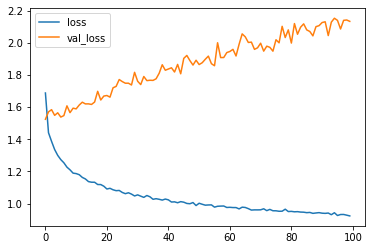

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

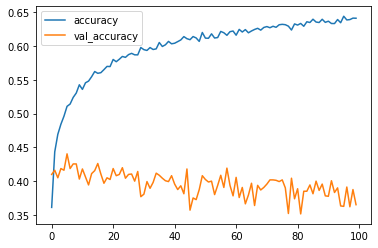

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [11]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [12]:
model.evaluate(test_batches)

51/51 [==============================] - 14s 263ms/step - loss: 2.0991 - accuracy: 0.3777


[2.099116563796997, 0.37765294313430786]

# Evaluate Model's Prediction Results

In [13]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.220430,0.262821,0.239766,156.000000
mpv,0.274074,0.342593,0.304527,108.000000
sedan,0.352577,0.413043,0.380423,414.000000
sport,0.547753,0.445205,0.491184,438.000000
suv,0.376812,0.274648,0.317719,284.000000
truck,0.455090,0.475000,0.464832,160.000000
wagon,0.106061,0.166667,0.129630,42.000000
accuracy,0.377653,0.377653,0.377653,0.377653
macro avg,0.333257,0.339997,0.332583,1602.000000
weighted avg,0.395851,0.377653,0.382631,1602.000000


Text(0.5, 69.0, 'Predicted Values')

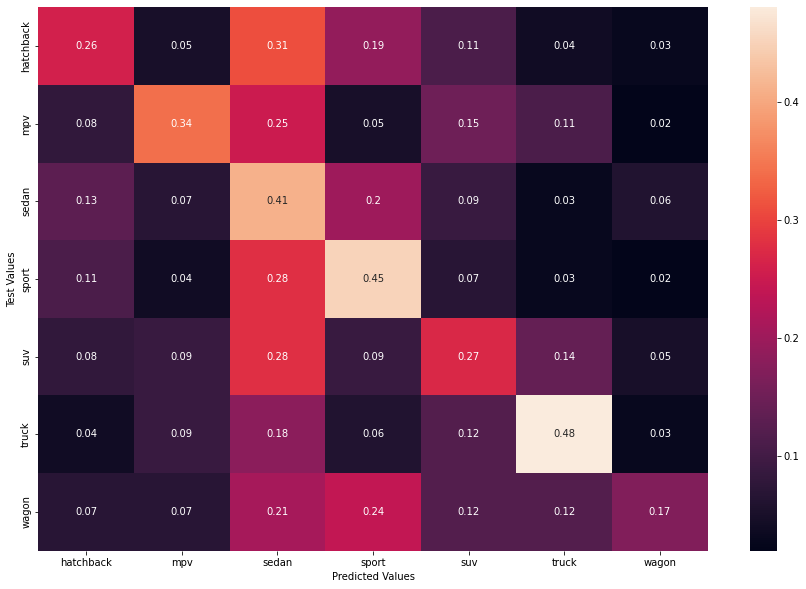

In [14]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [15]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 3.59
Execution Time (Minutes): 215.66
Execution Time (Seconds): 12939.5
